# Exploratory Data Analysis

*incomplete*

In [2]:
import sys
import os
import pathlib
import shutil
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import collections
import pathlib as pl

"""

    This script will iterate through the CT volume data and extract the voxel space, image dimension and intensity histogram (of patient 20)
    and store that data in global lists. Then these lists will be used to process, and plot the data into distributions bar graphs to count the
    occurences of the respective elements in each list.
    
"""

In [3]:
def dataExtraction(dataInput_abd_CT): 
        #globals
    global voxelSpacings
    global imageSize
    global intHGram
    
    abdominal_CT = pathlib.Path(dataInput_abd_CT)
    patientFiles = [file for file in abdominal_CT.iterdir()]
    for file in patientFiles:
        patientID = str(file.stem[0:4])
        filename = "patient_" + patientID
        if '.mhd' in str(file):
            reader = sitk.ReadImage(str(file), imageIO = "MetaImageIO")
            
            #store image size of patient x
            imageSize.append(reader.GetSize())
            
            #store voxel spacing of patient x
            voxelSpace = reader.GetSpacing()
            voxelSpace = (round(voxelSpace[0],1),round(voxelSpace[1],1),round(voxelSpace[2],1))
            voxelSpacings.append(voxelSpace)
            
            #store histogram of patient x
            histo = sitk.GetArrayFromImage(reader)
            intHGram.append(histo)


In [4]:
def plotTuple(inputList, dataType):
    #determine the labels and titles for plots 
    
    if dataType == 1:
        title_dataType = 'Voxel Spacing Distribution of Abdominal CT Volumes'
        xaxis = 'Voxel Spacing'
        yaxis = 'Occurences'
    if dataType == 2:
        title_dataType = 'Image Size Distribution of Abdominal CT Volumes'
        xaxis = 'Image Size'
        yaxis = 'Occurences'

        
        
   
    #use matplotlib to plot the distributions     
    plt.title(title_dataType)
    plt.ylabel(yaxis)
    plt.xlabel(xaxis)

    #get unique voxel spacing/image sizes from global list
    list_Counter = collections.Counter(inputList)
    keys = list_Counter.keys()
    vals = list_Counter.values()
    value_list = [] 
    key_string=[]
    
    #convert tuples to strings for plotting. 
    for k,v in list_Counter.items():
        value_list.append(v)      
        key_string.append(str(k))

    print()
    
    plt.bar(key_string,value_list)
    plt.show()
    

In [5]:
def plotIntensityData():
    global intHGram
  
    intHGram = intHGram[0]

    intensities = intHGram.flatten()


    plt.title('Intensity Distributions of Abdominal CT Volumes')
    plt.ylabel('Pixels')
    plt.xlabel('Intensity')
    plt.rc('axes', titlesize=12)
    plt.rc('axes', labelsize=8)
    plt.hist(intensities, rwidth=0.35, bins=100)
    plt.show()
    
    


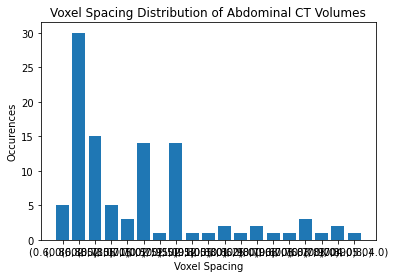

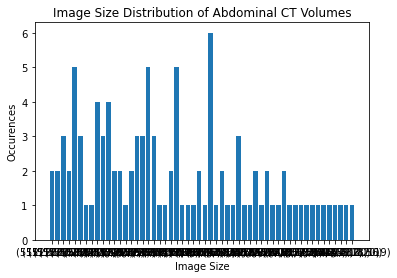

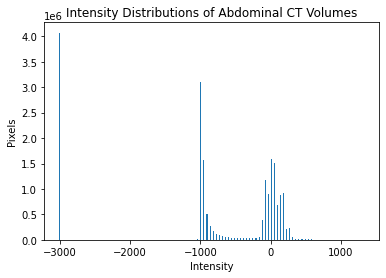

In [6]:
global voxelSpacings
global imageSize
global intHGram

voxelSpacings = []
imageSize = []
intHGram = []



def main():
    
    #globals
    global voxelSpacings
    global imageSize
    global intHGram
    
    #initialize the globals 

    
    dataExtraction('C:/Users/salch/Desktop/THESIS/pancreas_data/IPMN/data_whole_image') #Change Dir to converted data directory.
    
    #plot voxel space distribution of each modality for each patient in database. 
    plotTuple(voxelSpacings,1)

    #plot image size of each modality for each patient in database
    plotTuple(imageSize,2)


    plotIntensityData()

main()

The most commong voxel spacing throughout all 104 patients' CT scans is (0.82,0.82,2.5)
While the most common Image size is (512,512,98)

For resampling, I will resample the volumes of each CT volume to the specified above. 

In [8]:
#change the dir if needed~~
#--
#inputPath = 'C:/Users/salch/Desktop/THESIS/pancreas_data/IPMN/data_whole_image'
#--


def vol_read(inputPath):
    dataPath = pl.Path(inputPath)
    scans = [scan for scan in dataPath.iterdir()] # create python list of all the files in the provided dir

    #Python Lists to hold the sitk.image objects, the numpyarray representations, voxelspacing and volume dimensions

    ctArrList = [] #an array of numpy array representations of the CT volumes
    imageList = []
    voxelSpacings = []
    volDims = [] 
    volume_sizes =[]

    for volume in scans:
        patientID = str(volume.stem[0:4])
        #print(patientID)
        if ".mhd" in str(volume):
            vol = sitk.ReadImage(str(volume), imageIO="MetaImageIO")
            ct_scan_arr = sitk.GetArrayFromImage(vol)

            #append volume info to corresponding lists
            imageList.append(vol)
            ctArrList.append(ct_scan_arr)
            voxelSpacings.append(vol.GetSpacing())
            volDims.append(ct_scan_arr.shape)
            volume_sizes.append(vol.GetSize())
    for volume in volume_sizes:
        if volume[0] != 512 or volume[1] != 512:
            print("not of same dimension: ")
            print(volume)
        if volume[2] > 500: 
            print(patientID)

    print('\n\n~~Import Completed~~\n\n')
    print("Number of CT scans as numpy arrays: " + str(len(ctArrList)))
    print("Number of CT scans as Sitk image objects: " + str(len(imageList)))
    
    return volume_sizes
    
inputPath1 = 'C:/Users/salch/Desktop/THESIS/pancreas_data/IPMN/data_whole_image'
inputPath2 = 'C:/Users/salch/Desktop/THESIS/pancreas_data/IPMN/data_segmented_panc'

whole_shape = vol_read(inputPath1)
seg_shape = vol_read(inputPath2)
print('\n\n')

for i in range(len(whole_shape)):
    print(i)
    print('whole: ' +str( whole_shape[i][2]))
    print('seg: ' +str( seg_shape[i][2]))
    print('========')
    if whole_shape[i][2] != seg_shape[i][2]:
        print('Patient ' + str (i) + " has a segmented volume with a different number of slices.")

1593


~~Import Completed~~


Number of CT scans as numpy arrays: 103
Number of CT scans as Sitk image objects: 103
1593


~~Import Completed~~


Number of CT scans as numpy arrays: 103
Number of CT scans as Sitk image objects: 103



0
whole: 73
seg: 73
1
whole: 83
seg: 83
2
whole: 71
seg: 71
3
whole: 45
seg: 45
4
whole: 87
seg: 87
5
whole: 45
seg: 45
6
whole: 51
seg: 51
7
whole: 39
seg: 39
8
whole: 87
seg: 87
9
whole: 41
seg: 41
10
whole: 95
seg: 95
11
whole: 121
seg: 121
12
whole: 87
seg: 87
13
whole: 85
seg: 85
14
whole: 99
seg: 99
15
whole: 89
seg: 89
16
whole: 79
seg: 79
17
whole: 96
seg: 96
18
whole: 84
seg: 84
19
whole: 85
seg: 85
20
whole: 102
seg: 102
21
whole: 93
seg: 93
22
whole: 93
seg: 93
23
whole: 100
seg: 100
24
whole: 109
seg: 109
25
whole: 49
seg: 49
26
whole: 96
seg: 96
27
whole: 103
seg: 103
28
whole: 95
seg: 95
29
whole: 97
seg: 97
30
whole: 106
seg: 106
31
whole: 87
seg: 87
32
whole: 93
seg: 93
33
whole: 43
seg: 43
34
whole: 37
seg: 37
35
whole: 121
seg: 121
36
wh

For the patch extraction, I plan to use the segmented pancreas volumes to extract a center point for patch extraction. Therefore I had to confirm that the corresponding volumes had the same number of slices. 